<a href="https://colab.research.google.com/github/pawan-nandakishore/image_emotion_recognition/blob/master/colab_notebooks/turker_ensemble_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.python.lib.io import file_io

%matplotlib inline

import keras
from keras import backend as K
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model
from sklearn.metrics import *
from keras.engine import Model
from keras.layers import Input, Flatten, Dense, Activation, Conv2D, MaxPool2D, BatchNormalization, Dropout, MaxPooling2D
import skimage
from skimage.transform import rescale, resize
import seaborn as sns 


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
Resize_pixelsize = 197
labels = {0:'angry', 1:'disgust', 2:'fear', 3:'happy', 4:'sad', 5:'surprise', 6:'neutral'}
reverse_labels = {'angry':0, 'disgust':1, 'fear':2, 'happy':3, 'sad':4, 'surprise':5, 'neutral':6}

In [ ]:
# Function that reads the data from the csv file, increases the size of the images and returns the images and their labels
    # dataset: Data path
def get_data(dataset):
    
    file_stream = file_io.FileIO(dataset, mode='r')
    data = pd.read_csv(file_stream)
    data[' pixels'] = data[' pixels'].apply(lambda x: [int(pixel) for pixel in x.split()])
    X, Y = data[' pixels'].tolist(), data['emotion'].values
    X = np.array(X, dtype='float32').reshape(-1,48,48,1)
    X = X/255.0
   
    X_res = np.zeros((X.shape[0], Resize_pixelsize,Resize_pixelsize,3))
    for ind in range(X.shape[0]): 
        sample = X[ind]
        sample = sample.reshape(48, 48)
        image_resized = resize(sample, (Resize_pixelsize, Resize_pixelsize), anti_aliasing=True)
        X_res[ind,:,:,:] = image_resized.reshape(Resize_pixelsize,Resize_pixelsize,1)

    Y_res = np.zeros((Y.size, 7))
    Y_res[np.arange(Y.size),Y] = 1    
    
    return  X, X_res, Y_res

In [ ]:
local_path = "/content/drive/My Drive/Personal projects/emotion_recognition_paper/data/fer_csv/"
dev_dataset_dir = local_path +"dev.csv"
test_dataset_dir = local_path + "test.csv"

X_dev, X_res_dev, Y_dev   = get_data(dev_dataset_dir)
X_test, X_res_test, Y_test   = get_data(test_dataset_dir)


In [ ]:
model = load_model('/content/drive/My Drive//Personal projects/emotion_recognition_paper/cs230 project/models/soa-SGD_LR_0.01000-EPOCHS_300-BS_128-DROPOUT_0.3test_acc_0.663.h5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.




In [ ]:
print('\n# Evaluate on dev data')
results_dev = model.evaluate(X_dev,Y_dev)
print('dev loss, dev acc:', results_dev)

print('\n# Evaluate on test data')
results_test = model.evaluate(X_test,Y_test)
print('test loss, test acc:', results_test)


# Evaluate on dev data
3589/3589 [==============================] - 7s 2ms/step
dev loss, dev acc: [1.0376124512886862, 0.6358317136764526]

# Evaluate on test data
3589/3589 [==============================] - 0s 96us/step
test loss, test acc: [0.9683632094005118, 0.6631373763084412]


In [ ]:
model2 = load_model('/content/drive/My Drive/Personal projects/emotion_recognition_paper/cs230 project/models/soa-SGD_LR_0.01000-EPOCHS_300-BS_128-DROPOUT_0.4test_acc_0.657.h5')
print('\n# Evaluate on dev data')
results_dev = model2.evaluate(X_dev,Y_dev)
print('dev loss, dev acc:', results_dev)

print('\n# Evaluate on test data')
results_test = model2.evaluate(X_test,Y_test)
print('test loss, test acc:', results_test)


# Evaluate on dev data
3589/3589 [==============================] - 0s 119us/step
dev loss, dev acc: [1.0297004942709305, 0.6514349579811096]

# Evaluate on test data
3589/3589 [==============================] - 0s 100us/step
test loss, test acc: [0.9837366087119803, 0.6570075154304504]


In [ ]:
Resnet_model = load_model('/content/drive/My Drive/Personal projects/emotion_recognition_paper/cs230 project/models/tl/ResNet-BEST-73.2.h5')
print('\n# Evaluate on dev data')
results_dev = Resnet_model.evaluate(X_res_dev,Y_dev)
print('dev loss, dev acc:', results_dev)

print('\n# Evaluate on test data')
results_test = Resnet_model.evaluate(X_res_test,Y_test)
print('test loss, test acc:', results_test)



# Evaluate on dev data
3589/3589 [==============================] - 9s 3ms/step
dev loss, dev acc: [1.0430927035469104, 0.6960155963897705]

# Evaluate on test data
3589/3589 [==============================] - 8s 2ms/step
test loss, test acc: [0.9163703466730551, 0.7322373986244202]


In [ ]:
Resnet_model_wcw = load_model('/content/drive/My Drive/Personal projects/emotion_recognition_paper/cs230 project/models/tl/ResNet-BEST-WCW-0.677.h5')
print('\n# Evaluate on dev data')
results_dev = Resnet_model_wcw.evaluate(X_res_dev,Y_dev)
print('dev loss, dev acc:', results_dev)

print('\n# Evaluate on test data')
results_test = Resnet_model_wcw.evaluate(X_res_test,Y_test)
print('test loss, test acc:', results_test)


# Evaluate on dev data
3589/3589 [==============================] - 9s 3ms/step
dev loss, dev acc: [1.234229718145802, 0.669824481010437]

# Evaluate on test data
3589/3589 [==============================] - 8s 2ms/step
test loss, test acc: [1.1438238001128829, 0.676790177822113]


In [ ]:
# Senet_model = load_model('/content/drive/My Drive/cs230 project/models/tl/SeNet50-BEST-69.8.h5')
# print('\n# Evaluate on dev data')
# results_dev = Senet_model.evaluate(X_res_dev,Y_dev)
# print('dev loss, dev acc:', results_dev)

# print('\n# Evaluate on test data')
# results_test = Senet_model.evaluate(X_res_test,Y_test)
# print('test loss, test acc:', results_test)

In [ ]:
Senet_model_wcw = load_model('/content/drive/My Drive/Personal projects/emotion_recognition_paper/cs230 project/models/tl/SeNet50-WCW-BEST-68.9.h5')
print('\n# Evaluate on dev data')
results_dev = Senet_model_wcw.evaluate(X_res_dev,Y_dev)
print('dev loss, dev acc:', results_dev)

print('\n# Evaluate on test data')
results_test = Senet_model_wcw.evaluate(X_res_test,Y_test)
print('test loss, test acc:', results_test)


# Evaluate on dev data
3589/3589 [==============================] - 11s 3ms/step
dev loss, dev acc: [1.1761809358127804, 0.6831986904144287]

# Evaluate on test data
3589/3589 [==============================] - 9s 2ms/step
test loss, test acc: [1.0997743903345036, 0.6893284916877747]


In [ ]:
# VGG100_model = load_model('/content/drive/My Drive/cs230 project/models/tl/VGG-BEST-69.5.h5')
# print('\n# Evaluate on dev data')
# results_dev = VGG100_model.evaluate(X_res_dev,Y_dev)
# print('dev loss, dev acc:', results_dev)

# print('\n# Evaluate on test data')
# results_test = VGG100_model.evaluate(X_res_test,Y_test)
# print('test loss, test acc:', results_test)

In [ ]:
# VGG100_model_wcw = load_model("/content/drive/My Drive/cs230 project/models/tl/vgg100-WCW-BEST-70.h5")
# print('\n# Evaluate on dev data')
# results_dev = VGG100_model_wcw.evaluate(X_res_dev,Y_dev)
# print('dev loss, dev acc:', results_dev)

# print('\n# Evaluate on test data')
# results_test = VGG100_model_wcw.evaluate(X_res_test,Y_test)
# print('test loss, test acc:', results_test)

In [ ]:
Resnet_Aux_model = load_model("/content/drive/My Drive/Personal projects/emotion_recognition_paper/cs230 project/models/auxiliary/RESNET50-AUX-BEST-72.7.h5")
print('\n# Evaluate on dev data')
results_dev = Resnet_Aux_model.evaluate(X_res_dev,Y_dev)
print('dev loss, dev acc:', results_dev)

print('\n# Evaluate on test data')
results_test = Resnet_Aux_model.evaluate(X_res_test,Y_test)
print('test loss, test acc:', results_test)


# Evaluate on dev data
3589/3589 [==============================] - 10s 3ms/step
dev loss, dev acc: [0.861474073374959, 0.7074394226074219]

# Evaluate on test data
3589/3589 [==============================] - 8s 2ms/step
test loss, test acc: [0.802662629425509, 0.7194204330444336]


In [ ]:
Resnet_Aux_model_wcw = load_model("/content/drive/My Drive/Personal projects/emotion_recognition_paper/cs230 project/models/auxiliary/RESNET50-WCW-AUX-BEST-72.4.h5")
print('\n# Evaluate on dev data')
results_dev = Resnet_Aux_model_wcw.evaluate(X_res_dev,Y_dev)
print('dev loss, dev acc:', results_dev)

print('\n# Evaluate on test data')
results_test = Resnet_Aux_model_wcw.evaluate(X_res_test,Y_test)
print('test loss, test acc:', results_test)


# Evaluate on dev data
3589/3589 [==============================] - 10s 3ms/step
dev loss, dev acc: [0.858198020809638, 0.7035385966300964]

# Evaluate on test data
3589/3589 [==============================] - 8s 2ms/step
test loss, test acc: [0.7959005610296473, 0.7227640151977539]


In [ ]:
Senet_Aux_model = load_model('/content/drive/My Drive/Personal projects/emotion_recognition_paper/cs230 project/models/auxiliary/SENET50-AUX-BEST-72.5.h5')
print('\n# Evaluate on dev data')
results_dev = Senet_Aux_model.evaluate(X_res_dev,Y_dev)
print('dev loss, dev acc:', results_dev)

print('\n# Evaluate on test data')
results_test = Senet_Aux_model.evaluate(X_res_test,Y_test)
print('test loss, test acc:', results_test)


# Evaluate on dev data
3589/3589 [==============================] - 11s 3ms/step
dev loss, dev acc: [2.071251667419427, 0.7107829451560974]

# Evaluate on test data
3589/3589 [==============================] - 9s 3ms/step
test loss, test acc: [1.885079555192692, 0.7219281196594238]


In [ ]:
Senet_Aux_model_wcw = load_model('/content/drive/My Drive/Personal projects/emotion_recognition_paper/cs230 project/models/auxiliary/SENET50-WCW-AUX-BEST-71.6.h5')
print('\n# Evaluate on dev data')
results_dev = Senet_Aux_model_wcw.evaluate(X_res_dev,Y_dev)
print('dev loss, dev acc:', results_dev)

print('\n# Evaluate on test data')
results_test = Senet_Aux_model_wcw.evaluate(X_res_test,Y_test)
print('test loss, test acc:', results_test)


# Evaluate on dev data
3589/3589 [==============================] - 12s 3ms/step
dev loss, dev acc: [1.9064431680746814, 0.7107829451560974]

# Evaluate on test data
3589/3589 [==============================] - 9s 3ms/step
test loss, test acc: [1.8377275247034437, 0.7099470496177673]


In [ ]:
# !ls "/content/drive/My Drive/Personal projects/emotion_recognition_paper/cs230 project/models/final/"

In [ ]:
VGG_Aux_model = load_model("/content/drive/My Drive/Personal projects/emotion_recognition_paper/cs230 project/models/auxiliary/VGG16-AUX-BEST-70.2.h5")
print('\n# Evaluate on dev data')
results_dev = VGG_Aux_model.evaluate(X_res_dev,Y_dev)
print('dev loss, dev acc:', results_dev)

print('\n# Evaluate on test data')
results_test = VGG_Aux_model.evaluate(X_res_test,Y_test)
print('test loss, test acc:', results_test)



# Evaluate on dev data
3589/3589 [==============================] - 12s 3ms/step
dev loss, dev acc: [0.908596164687293, 0.6884925961494446]

# Evaluate on test data
3589/3589 [==============================] - 9s 3ms/step
test loss, test acc: [0.8508083838196178, 0.6929506659507751]


In [ ]:
models_SOA = [model, model2]
models_TL = [Resnet_model, Resnet_Aux_model_wcw, Senet_Aux_model, Senet_Aux_model_wcw, VGG_Aux_model]

In [ ]:
# make an ensemble prediction for multi-class classification
def ensemble_predictions(models_SOA, testX, models_TL, testresX):
  # make predictions
  yhats = np.zeros((len(models_SOA)+len(models_TL),testX.shape[0],7))

  for model_ind in range(len(models_SOA)):
    yhat = models_SOA[model_ind].predict(testX)
    yhats[model_ind,:,:] = yhat

  for model_ind in range(len(models_TL)):
    yhat = models_TL[model_ind].predict(testresX)
    yhats[len(models_SOA)+model_ind,:,:] = yhat

  summed = np.sum(yhats, axis=0)
  result = np.argmax(summed, axis=1)
  return result
 
# evaluate a specific number of members in an ensemble
def evaluate_n_members(models_SOA, testX, models_TL, testresX, testy):
	# select a subset of members
	#subset = members[:n_members]
	#print(len(subset))
	# make prediction
	yhat = ensemble_predictions(models_SOA, testX, models_TL, testresX)
	# calculate accuracy
	return accuracy_score(testy, yhat)

In [ ]:
ens_acc = evaluate_n_members(models_SOA, X_test, models_TL, X_res_test, np.argmax(Y_test, axis=1))
print(ens_acc)

0.7575926441905824


In [ ]:
# adding confusion matrix here 
yhats = np.zeros((len(models_TL), X_test.shape[0], 7))
y_test = np.argmax(Y_test, axis=1)
for model_ind in range(len(models_TL)):
    yhat = models_TL[model_ind].predict(X_res_test)
    yhats[model_ind,:,:] = yhat

summed = np.sum(yhats, axis=0)
ypred = np.argmax(summed, axis=1)


In [ ]:
# conf_matrix = confusion_matrix(testresY, yhats) 
accuracy_score(y_test, ypred)

0.7564781276121483

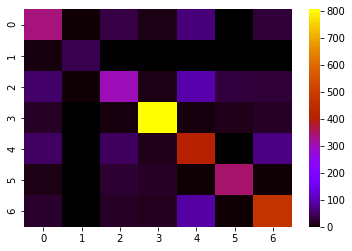

In [ ]:
sns.heatmap(confusion_matrix(y_test, ypred), cmap='gnuplot')
plt.show()

In [ ]:
testX = X_test
testresX = X_res_test
yhats = np.zeros((len(models_SOA)+len(models_TL),testX.shape[0],7))

for model_ind in range(len(models_SOA)):
    yhat = models_SOA[model_ind].predict(testX)
    yhats[model_ind,:,:] = yhat

for model_ind in range(len(models_TL)):
    yhat = models_TL[model_ind].predict(testresX)
    yhats[len(models_SOA)+model_ind,:,:] = yhat

summed = np.sum(yhats, axis=0)
ypred = np.argmax(summed, axis=1)

In [ ]:
# original accucary
print("original accuracy: {}".format(accuracy_score(ypred, y_test)))

original accuracy: 0.7575926441905824


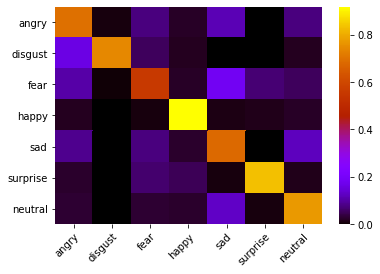

In [ ]:
fig= sns.heatmap(confusion_matrix(y_test, ypred, normalize='true'), cmap='gnuplot')
fig.set_xticklabels(list(labels.values()))
fig.set_yticklabels(list(labels.values()))
plt.setp(fig.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.setp(fig.get_yticklabels(), rotation=0, ha="right",
         rotation_mode="anchor")
plt.show()

In [ ]:
# actual values of the confusion matrix
confusion_matrix(y_test, ypred, normalize='true')

array([[0.69653768, 0.0101833 , 0.07535642, 0.02240326, 0.11812627,
        0.00203666, 0.07535642],
       [0.16363636, 0.74545455, 0.05454545, 0.01818182, 0.        ,
        0.        , 0.01818182],
       [0.10416667, 0.00568182, 0.55681818, 0.02462121, 0.18371212,
        0.07007576, 0.05492424],
       [0.0182025 , 0.        , 0.00796359, 0.91808874, 0.01365188,
        0.01706485, 0.02502844],
       [0.08754209, 0.        , 0.07744108, 0.02525253, 0.68181818,
        0.003367  , 0.12457912],
       [0.02644231, 0.        , 0.06490385, 0.05048077, 0.00961538,
        0.83413462, 0.01442308],
       [0.03035144, 0.        , 0.03194888, 0.02555911, 0.13258786,
        0.00798722, 0.7715655 ]])